# ne_110m_admin_0_countries Dataset

## Overview
The `ne_110m_admin_0_countries` dataset is part of the Natural Earth project, which offers free vector and raster map data for various geographic applications. This dataset provides detailed geometries and attributes of countries and administrative boundaries at a scale of 1:110 million.

## Key Features

- **Scale**: 1:110 million, suitable for small-scale mapping.
- **Data Type**: Vector polygons representing country boundaries.
- **Administrative Boundaries**: Includes the shapes of sovereign states and territories.
- **Attributes**: Contains important information such as:
  - Country names
  - ISO country codes
  - Population data (in some versions)
  - Other relevant metadata

## Example Use Cases
- Creating world maps for educational purposes.
- Analyzing geographic data related to countries.
- Visualizing demographic information on a global scale.

In [1]:
!unzip -l {'ne_110m_admin_0_countries.zip'}

Archive:  ne_110m_admin_0_countries.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
       10  2018-05-06 23:28   ne_110m_admin_0_countries.cpg
    51347  2018-05-06 23:28   ne_110m_admin_0_countries.dbf
      143  2018-05-06 23:28   ne_110m_admin_0_countries.prj
   180924  2018-05-06 23:28   ne_110m_admin_0_countries.shp
     1516  2018-05-06 23:28   ne_110m_admin_0_countries.shx
---------                     -------
   233940                     5 files


In [2]:
import geopandas as gpd

countries = gpd.read_file('ne_110m_admin_0_countries.zip')

In [3]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58, 2..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [4]:
countries.shape

(177, 6)

In [5]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iso_a3      177 non-null    object  
 1   name        177 non-null    object  
 2   continent   177 non-null    object  
 3   pop_est     177 non-null    float64 
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 8.4+ KB


In [6]:
countries['name'].nunique()

177

In [7]:
countries['continent'].value_counts()

,count
continent,
Africa,51
Asia,47
Europe,39
North America,18
South America,13
Oceania,7
Antarctica,1
Seven seas (open ocean),1


<Axes: >

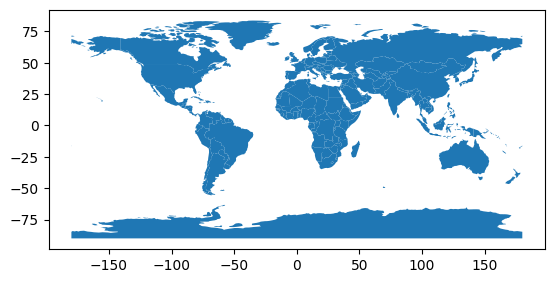

In [8]:
countries.plot()

In [9]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# remove Antarctica
country_gdf = countries[countries['continent'] != 'Antarctica']

<Axes: >

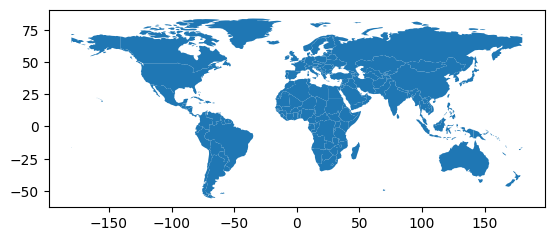

In [12]:
country_gdf.plot()

Antarctica is often removed from geographic visualizations, especially when using the Mercator projection, for a couple of key reasons:

- ***Distortion***: The Mercator projection greatly distorts land masses near the poles. As a result, Antarctica appears much larger than it actually is compared to countries near the equator. This can mislead viewers about its size and geographical relationships.

- ***Relevance***: In many contexts, Antarctica is not relevant to the analysis, especially when focusing on political, economic, or demographic data, which primarily pertains to populated regions.

By removing Antarctica, the visualization can provide a clearer and more accurate representation of the other countries and their relative sizes and positions.

<Axes: >

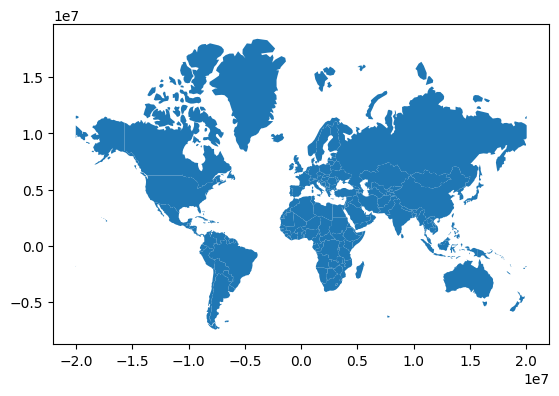

In [13]:
countries_mercator = country_gdf.to_crs(epsg=3395)      # Web Mercator
countries_mercator.plot()

<Axes: >

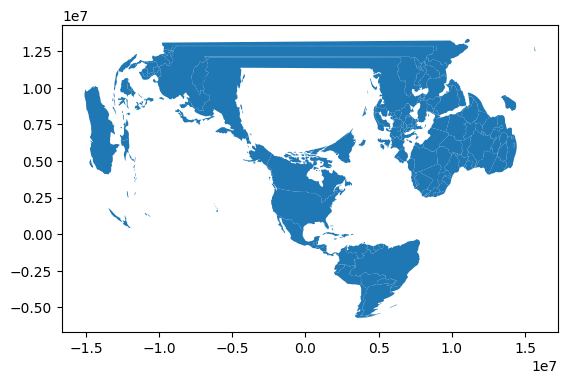

In [14]:
countries_albers_ea = country_gdf.to_crs(epsg=5070)
countries_albers_ea.plot()

### Differences in Graphs Between EPSG: 3395 (Web Mercator) and EPSG: 5070 (Albers Equal Area)

The significant differences in the graphs when plotting countries in EPSG: 3395 (Web Mercator) versus EPSG: 5070 (Albers Equal Area) can be attributed to how each projection handles the representation of geographic features. Here are the key reasons for the differences:

1. **Projection Type**:
   - **EPSG: 3395 (Web Mercator)**: This is a cylindrical projection that preserves angles and shapes but distorts area, especially near the poles. As a result, countries at higher latitudes appear much larger than they are in reality.
   - **EPSG: 5070 (Albers Equal Area)**: This conic projection preserves area, meaning that the relative size of countries is accurately represented. However, it may distort shapes and angles, especially at the edges of the projection.

2. **Focus and Scale**:
   - **Web Mercator** is often used for web mapping because it allows for seamless zooming and panning, but it can exaggerate the size of polar regions, making countries like Canada and Russia appear much larger than they actually are.
   - **Albers Equal Area** is tailored for regions of interest, especially when analyzing data that requires accurate area representation. The distortion is minimized in the central region of the projection.

3. **Visual Appearance**:
   - Due to the distortions in Web Mercator, the overall layout and relationships between countries can look quite different compared to Albers Equal Area, where the actual sizes and areas are more accurately depicted.

<br/>

### Choosing the Reliable Projection

The reliability of a projection depends on the specific goals of your analysis:

1. **For Area Accuracy**:
   - If your primary concern is accurately representing the size of countries or regions (e.g., for land use, environmental studies), **EPSG: 5070 (Albers Equal Area)** is more reliable. It preserves area, making it suitable for analyses where area relationships are critical.

2. **For Navigation and Online Mapping**:
   - If you need a projection for web mapping or applications that require smooth navigation and seamless zooming (e.g., Google Maps), **EPSG: 3395 (Web Mercator)** is reliable. However, be cautious about its area distortions, especially for polar regions.

3. **For General Purpose**:
   - If you need a balanced view for general mapping without a specific focus on area or shape, **EPSG: 4326 (WGS 84)** is a good choice. It provides a standard geographic coordinate system based on latitude and longitude, widely used in various applications.

### Summary

- **Use EPSG: 5070 (Albers Equal Area)** for accurate area representation.
- **Use EPSG: 3395 (Web Mercator)** for web mapping and navigation.
- **Use EPSG: 4326 (WGS 84)** for general geographic purposes.

In summary, the choice of projection greatly influences how geographic data is visualized, affecting perceptions of size, shape, and spatial relationships. Depending on your analysis goals, selecting the appropriate CRS is essential for accurate interpretation of the data. Ultimately, choose the projection that aligns with your analysis needs and the specific characteristics of the data you are working with!